# Hierarchical Clustering

## Importing the libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load data


In [3]:
df = pd.read_csv('Mall_Customers.csv')
df.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## 

In [4]:
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X = df[features]

## for feature scaling

In [5]:

from sklearn.preprocessing import StandardScaler 

## Standardize features


In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Hierarchical clustering

In [8]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score


## Plot dendrogram


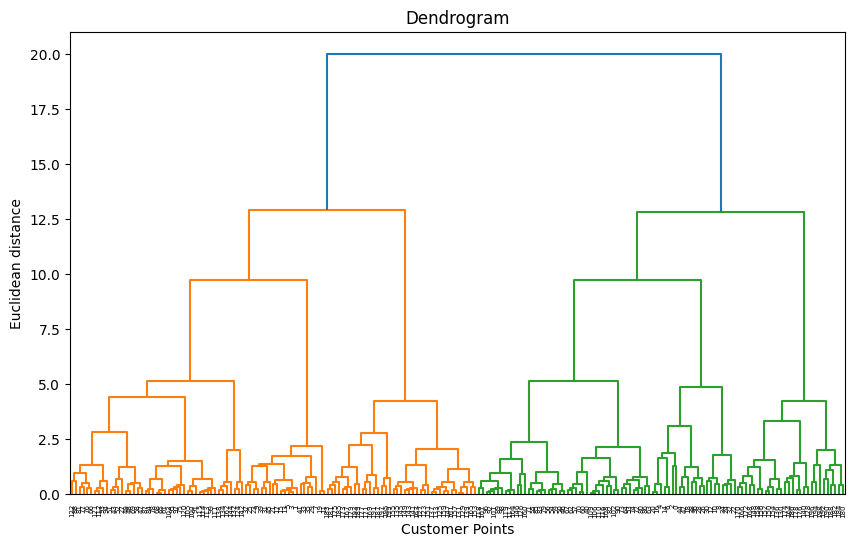

In [9]:
plt.figure(figsize=(10, 6))
linked = linkage(X_scaled, method='ward')
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=False)
plt.title('Dendrogram')
plt.xlabel('Customer Points')
plt.ylabel('Euclidean distance')
plt.show()

In [10]:
from sklearn.decomposition import PCA  # for visualization
from sklearn.cluster import AgglomerativeClustering 

## Determine the optimal number of clusters using silhouette score


In [11]:
sil_scores = []
K = range(4, 11)
for k in K:
    ac = AgglomerativeClustering(n_clusters=k, metric='euclidean', linkage='ward') # <- FIXED!
    labels = ac.fit_predict(X_scaled)
    sil_scores.append(silhouette_score(X_scaled, labels))

optimal_k = K[np.argmax(sil_scores)]
print(f"Optimal number of clusters (highest silhouette score): {optimal_k}")


Optimal number of clusters (highest silhouette score): 6


## Fit final model


In [12]:
ac = AgglomerativeClustering(n_clusters=optimal_k, metric='euclidean', linkage='ward')
labels = ac.fit_predict(X_scaled)
df['Cluster'] = labels

## Cluster summaries


In [13]:
summary = df.groupby('Cluster')[features].mean()
summary['Size'] = df['Cluster'].value_counts().sort_index()
print("\nCluster segment summaries:\n", summary)


Cluster segment summaries:
                Age  Annual Income (k$)  Spending Score (1-100)  Size
Cluster                                                             
0        27.377778           57.511111               45.844444    45
1        56.400000           55.288889               48.355556    45
2        32.692308           86.538462               82.128205    39
3        43.892857           91.285714               16.678571    28
4        44.318182           25.772727               20.272727    22
5        24.809524           25.619048               80.238095    21


## PCA visualization


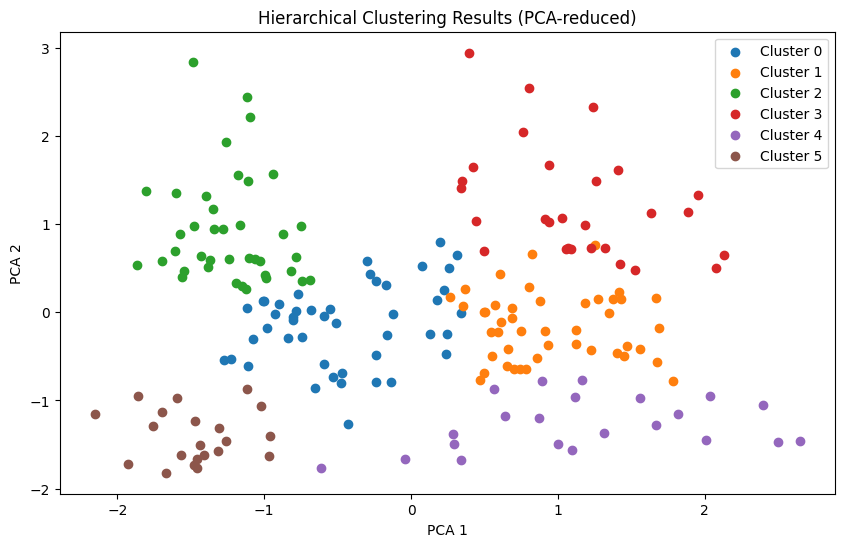

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
for cluster in range(optimal_k):
    plt.scatter(X_pca[labels==cluster, 0], X_pca[labels==cluster, 1], label=f'Cluster {cluster}')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Hierarchical Clustering Results (PCA-reduced)')
plt.legend()
plt.show()